# ADAM: Automatic Danger Area Marking 
## Image analysis framework to quantitatively display anastomotic deficiency

*Indocyanine-green* (ICG) is a fluorescent protein which binds to albumin in blood when injected into the human body. As such, it can be used to qualitatively detect the perfusion of blood when the fluorescent signal is imaged. The fluorescence will after a certain time reach a plateau, corresponding to the injected ICG concentration. 

Quantifying the time to the fluorescence plateau is not possible by eye. To combat this difficulity, one can apply some kind of image analysis to measure the time to the fluorescence maximum in each pixel.

Here, such an image analysis framework is proposed. It is tested on three Monte-Carlo simulations of the fluorescence signal when the uptake of ICG varies throughout the tissue. It is shown that the software manages to display a human-interpretable image in each case, in which the uptake of ICG is quantified. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from matplotlib.patches import Rectangle

import ADAMfuncs as adf

## Simulation 1

In [2]:
mv1, fps = adf.readmovie("slow_evol_crop.mp4")

Image output will be 720*720 pixels
Done


In [3]:
mask_d = adf.gen_danger_matrix_deriv(mv1, fps)

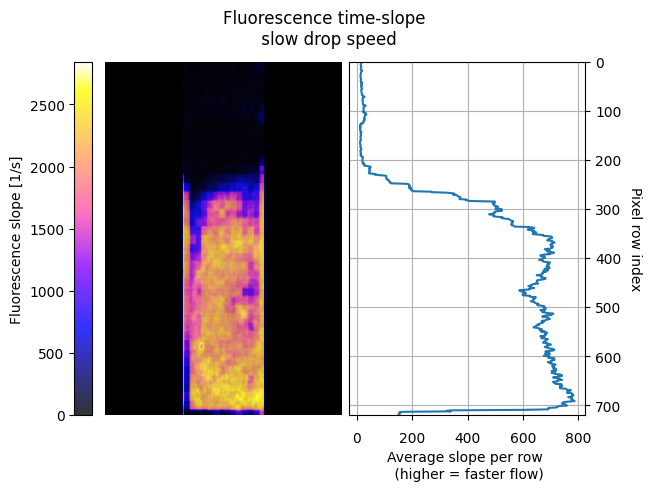

In [4]:
plt.rcParams['xtick.major.pad'] = '8'
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True)
fig.suptitle("Fluorescence time-slope \n slow drop speed")
ax1.imshow(mv1[-1], cmap = "gray", alpha = 1)
ax1.axis("off")
img = ax1.imshow(mask_d, cmap = "gnuplot2", aspect = "auto", alpha = 0.8)
fig.colorbar(img, label = "Fluorescence slope [1/s]", location = "left")
pixel_t, pixel_n = adf.avg_pixel_time(mask_d)
ax2.plot(pixel_n, pixel_t)
ax2.set_xlabel("Average slope per row \n (higher = faster flow)")
ax2.set_ylabel("Pixel row index", rotation = 270, labelpad = 15)
ax2.grid()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylim(720, 0)
plt.savefig("slope_slow.pdf", bbox_inches = "tight")

In [5]:
mask_d = adf.gen_danger_matrix(mv1, 80, fps)

Calculating mask
Done


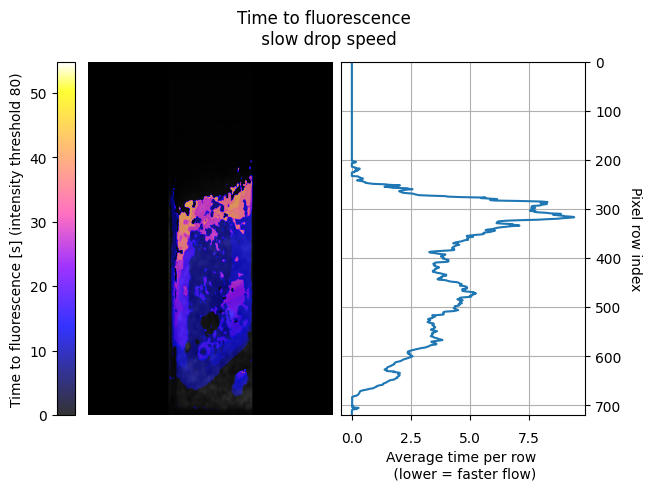

In [6]:
plt.rcParams['xtick.major.pad'] = '8'
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True)
fig.suptitle("Time to fluorescence \n slow drop speed")
ax1.imshow(mv1[-1], cmap = "gray", alpha = 1)
ax1.axis("off")
img = ax1.imshow(mask_d, cmap = "gnuplot2", aspect = "auto", alpha = 0.8)
fig.colorbar(img, label = "Time to fluorescence [s] (intensity threshold 80)", location = "left")
pixel_t, pixel_n = adf.avg_pixel_time(mask_d)
ax2.plot(pixel_n, pixel_t)
ax2.set_xlabel("Average time per row \n (lower = faster flow)")
ax2.set_ylabel("Pixel row index", rotation = 270, labelpad = 15)
ax2.grid()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylim(720, 0)
plt.savefig("time_slow.pdf", bbox_inches = "tight")